# Regresión Lineal - Recargado

En este notebook pondrás en práctiva la aplicación de modelos de regresión lineal a problemas no lineales. También incroporarás la técnica de regularización para evitar el overfitting, un problema común en este tipo de enfoques.


## 1. Regresión No-Lineal

Vamos a comenzar, como siempre hacemos en estos temas, con un ejemplo controlado. Supongamos que tenenos un dataset con dos atributos, $x$ e $y$, y la relación entre ellos es $y = -2x^4+3x^2+1$


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

La siguiente celda genera nuestro dataset sintético. Le sumamos ruido para simular una situación más realista.

In [2]:
n = 300
x = np.linspace(-1,1,n)
y_real = -1.5*x**4+3*x**2+1
y = y_real + 0.1*np.random.randn(n)

Graficamos la muestra y la curva teórica.

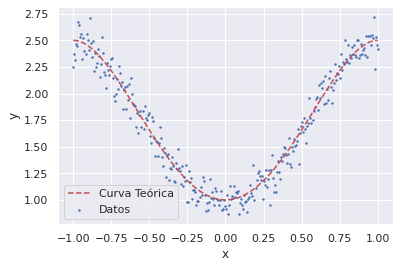

In [3]:
plt.scatter(x,y, s = 2, label = 'Datos')
plt.plot(x, y_real, '--',label ='Curva Teórica', c = 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Vamos a entrenar un modelo de Regresión Lineal, al que llamaremos `reg_1`. Primero, vamos a definir nuestro dataset `X` (notar la diferencia con la variable `x`)- Luego, hacer un `train_test_split`, y entrenar la regresión lineal.

In [4]:
from sklearn.model_selection import train_test_split

X = x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
reg_1 = LinearRegression()

In [6]:
reg_1.fit(X_train, y_train)

LinearRegression()

In [7]:
y_train_pred_1 = reg_1.predict(X_train)
y_test_pred_1 = reg_1.predict(X_test)

Graficamos la regresión obtenida.

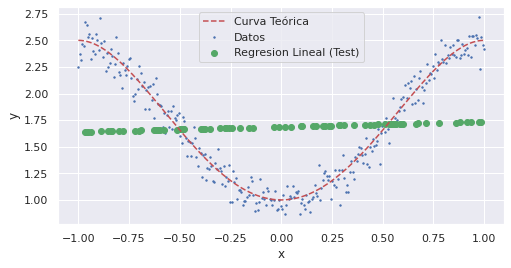

In [8]:
plt.figure(figsize = (8,4))
plt.scatter(x,y, s = 2, label = 'Datos')
plt.plot(x, y_real, '--',label ='Curva Teórica', c = 'r')
plt.scatter(X_test,y_test_pred_1,label ='Regresion Lineal (Test)', c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Ya en el gráfico podemos ver que la regresión obtenida es un modelo malo, ya que no captura correctamente la relación entre $x$ e $y$, salvo por, prácticamente, su valor medio.

De todas formas, calculamos el error RMSE, hacemos un histograma de los errores en el conjunto de Train y Test, y una curva `y` vs `y_pred`

Raíz del error cuadrático medio en Train: 0.5459526791304321
Raíz del error cuadrático medio en Test: 0.5240189041135561


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


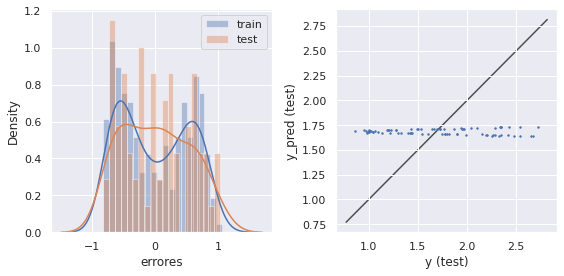

In [9]:
from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_1))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_1))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_1, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_1, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_1, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

Tal cómo sucedió en ejemplo de la bitácora, el modelo parece muy lejos de la realidad. Veamos si lo podemos mejorar.

Para facilitar la comprensión del código, vamos a crear una función que nos sirva para evaluar modelos de regresión.

In [10]:
def evaluar_regresion(model,x,y, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    
    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (12,4))
    plt.subplot(1,3,1)
    plt.scatter(x,y, s = 2, label = 'Datos')
    plt.plot(x, y_real, '--',label ='Curva Teórica', c = 'r')
    
    list1, list2 = zip(*sorted(zip(X_train[:,0], y_train_pred))) 
    
    #The zip() function takes iterables (can be zero or more), aggregates them in a tuple, and return it.
    #The sorted() function sorts the elements of a given iterable in a specific order (either ascending or descending) and returns the sorted iterable as a list.
    

    plt.plot(list1, list2,label ='Regresión (train)')
    
    list1, list2 = zip(*sorted(zip(X_test[:,0], y_test_pred)))
    plt.plot(list1, list2,label = 'Regresión (test)')

    
#     plt.scatter(X_train[:,0],y_train_pred,label ='Regresión (train)', s = 8)
#     plt.scatter(X_test[:,0],y_test_pred,label = 'Regresión (test)', s = 8)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()


    plt.subplot(1,3,2)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,3,3)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

### 1.2 Atributos Polinómicos


Vamos a agregar al dataset, `X`, nuevos atributos polinómicos: $x^2, x^3$ y $x^4$  y volver a ajustar la regresión lineal.

Cada atributo lo vamos a agregar de a uno, y vamos a ver cómo se modifica la regresión. **Presta mucha atención al código**. Al agregar un atributo nuevo, ¿qué ocurría con la regresíon lineal?

In [11]:
print(list(enumerate(range(1,6))))

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]


REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 1
Agregamos atributos hasta la potencia x**1
Los atributos tienen forma: (300, 1)
Pendientes: [0.04831448]
Ordenada: 1.6861528935986874
Raíz del error cuadrático medio en Train: 0.5459526791304321
Raíz del error cuadrático medio en Test: 0.5240189041135561


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


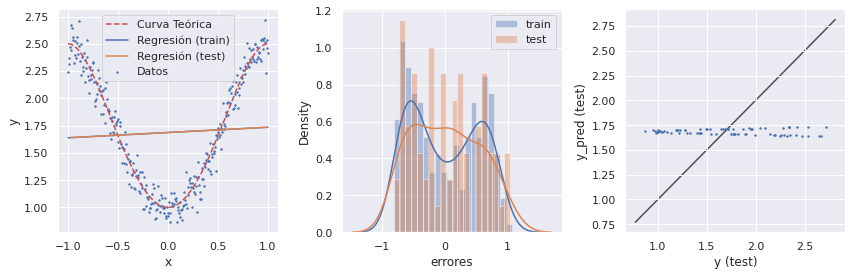

REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 2
Agregamos atributos hasta la potencia x**2
Los atributos tienen forma: (300, 2)
Pendientes: [0.02332636 1.71724736]
Ordenada: 1.1095814983909438
Raíz del error cuadrático medio en Train: 0.16361520903298302
Raíz del error cuadrático medio en Test: 0.15337508688216786


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


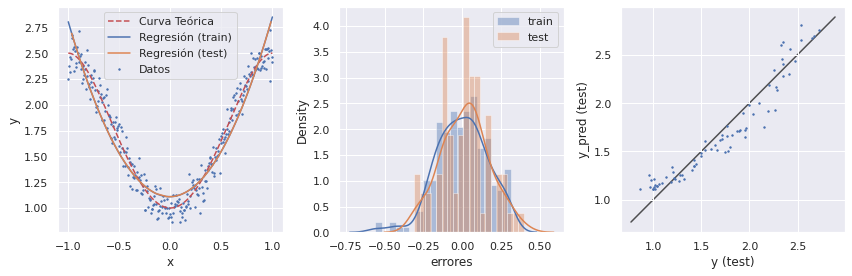

REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 3
Agregamos atributos hasta la potencia x**3
Los atributos tienen forma: (300, 3)
Pendientes: [0.010649   1.71724285 0.02078518]
Ordenada: 1.1095154041962192
Raíz del error cuadrático medio en Train: 0.16358547514425173
Raíz del error cuadrático medio en Test: 0.15325701345255233


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


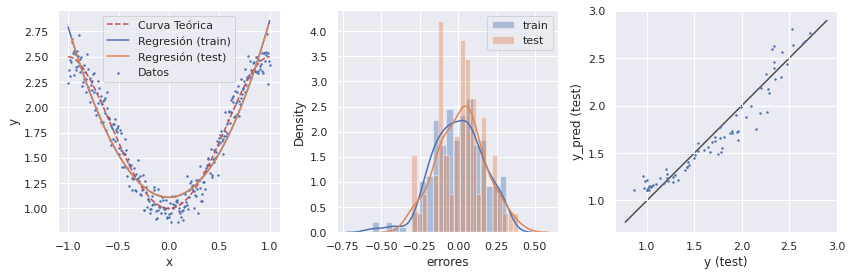

REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 4
Agregamos atributos hasta la potencia x**4
Los atributos tienen forma: (300, 4)
Pendientes: [ 0.01742563  3.11935432  0.00900263 -1.64045557]
Ordenada: 0.9747297238315701
Raíz del error cuadrático medio en Train: 0.10341962371961237
Raíz del error cuadrático medio en Test: 0.106252276390262


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


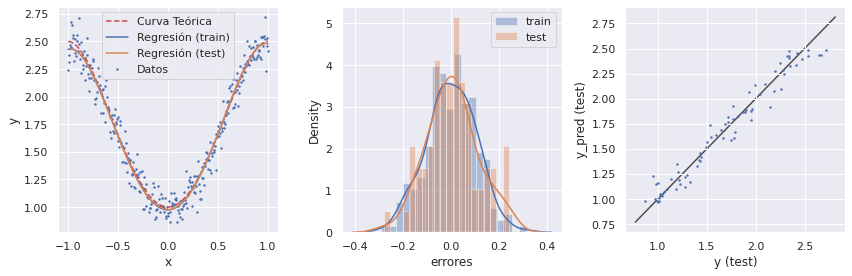

REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 5
Agregamos atributos hasta la potencia x**5
Los atributos tienen forma: (300, 5)
Pendientes: [-0.02089757  3.11936599  0.18498366 -1.64084899 -0.15715043]
Ordenada: 0.9746576724395113
Raíz del error cuadrático medio en Train: 0.10323165849120311
Raíz del error cuadrático medio en Test: 0.10595259643896236


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


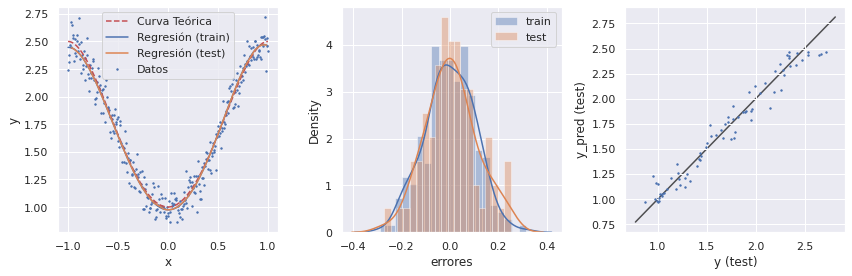

REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 6
Agregamos atributos hasta la potencia x**6
Los atributos tienen forma: (300, 6)
Pendientes: [-0.02019078  2.73489341  0.17752768 -0.50698339 -0.15110472 -0.81966517]
Ordenada: 0.9924057142765661
Raíz del error cuadrático medio en Train: 0.10193426017564353
Raíz del error cuadrático medio en Test: 0.10965681074121554


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


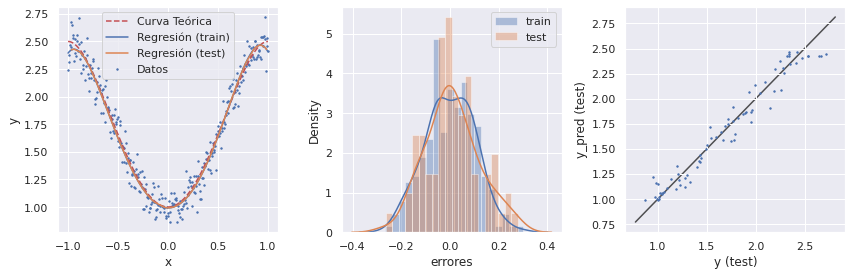

REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 7
Agregamos atributos hasta la potencia x**7
Los atributos tienen forma: (300, 7)
Pendientes: [-0.03122096  2.73648208  0.27725702 -0.51087518 -0.36816938 -0.81701851
  0.13272674]
Ordenada: 0.9923118806624108
Raíz del error cuadrático medio en Train: 0.10192587023193383
Raíz del error cuadrático medio en Test: 0.10964549928408049


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


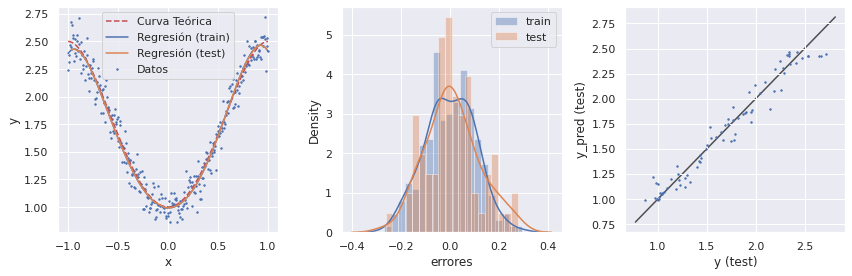

REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 8
Agregamos atributos hasta la potencia x**8
Los atributos tienen forma: (300, 8)
Pendientes: [-0.03150622  2.89053743  0.2757481  -1.35874061 -0.35997678  0.6449685
  0.12529449 -0.7773673 ]
Ordenada: 0.988181317234562
Raíz del error cuadrático medio en Train: 0.1018485394035347
Raíz del error cuadrático medio en Test: 0.11007629572680824


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


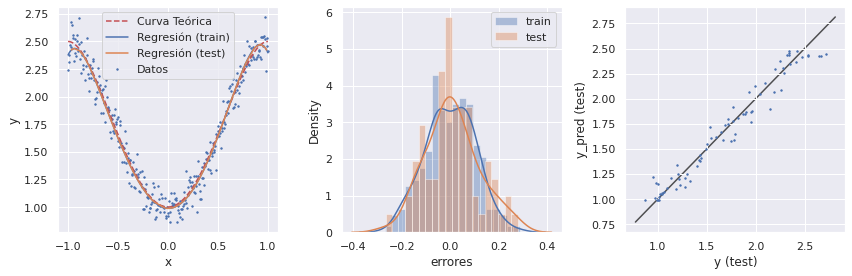

REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 9
Agregamos atributos hasta la potencia x**9
Los atributos tienen forma: (300, 9)
Pendientes: [  0.10930944   2.88075374  -1.76265501  -1.33474265   7.43694895
   0.60884708 -10.82781386  -0.75250752   5.09609046]
Ordenada: 0.9890221576596632
Raíz del error cuadrático medio en Train: 0.10102230117651312
Raíz del error cuadrático medio en Test: 0.10801550975950604


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


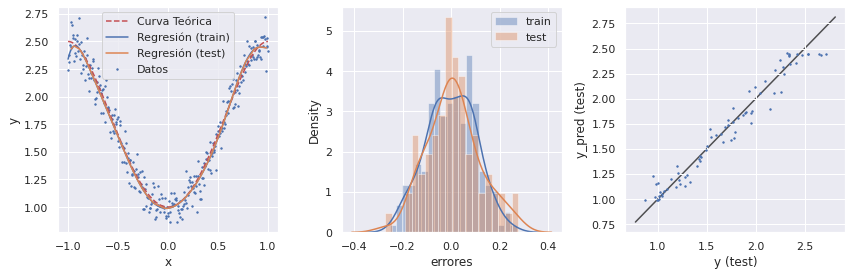

In [12]:
for idx,potencia_maxima in enumerate(range(1,10)):
    print(f'REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO {idx + 1}')
    print(f'Agregamos atributos hasta la potencia x**{potencia_maxima}')
    
    X = x.reshape(-1,1)
    for potencia in range(2,potencia_maxima+1):
        X = np.hstack((X,(x**potencia).reshape(-1,1)))
    print(f'Los atributos tienen forma: {X.shape}')
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)
    
    ### ENTRENAMOS
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    
    ### COMPLETAR AQUI PARA RESOLVER CHALLENGE
    print(f'Pendientes: {reg.coef_}')
    print(f'Ordenada: {reg.intercept_}')
    
    evaluar_regresion(reg, x,y, X_train, X_test, y_train, y_test)


Una aclaración sobre el código: es una buena práctica estandarizar los datos (normalizar) antes de entrenar una regresión lineal. No lo hicimos para no saturar (aún más) la explicación.


**Para Pensar - Challenge**

1. ¿Por que no parecen haber cambios entre el segundo y el tercer gráfico?¿Y entre el cuarto y el quinto?

` hay que mirar la forma de la funcion x*2 y x*3 y vemos que en los extremos no ajusta los datos con lsa curvas teoricas que usamos` 

` llevar a un orden mayor a 4 complejiza el modelo y no mejora ni la distribución de erroes ni el y_pred vs y`

2. Modifica el código de forma tal que imprima los coeficientes (pendientes y ordenada al origen) de cada regresión entrenada.

`    print(f'Pendientes: {reg.coef_}')`
  `  print(f'Ordenada: {reg.intercept_}')`
  
    
3. Agrega atributos de orden polinómico más alto y observa qué sucede. **Nota:** la modificación que tienes que hacer en el código es mínima. No tengas miedo de probar diferentes órdenes de magnitud.


`del orden 5 en adelante no cambia la forma del ajuste y el cambio en el error no es significativo`


## 2. `PolynomialFeatures`

En la práctica, no deberás agregar atributos polinómicos como hicimos en el ejemplo anterior, sino que podrás usar la clase `PolynomialFeatures` de Scikit-Learn. Lee atentamente su documentación y aplícala en el mismo problema de la sección 1. Nosotros te guiamos en los pasos, pero si crees que no lo necesitas, puedes hacerlo en un notebook aparte o borrar las celdas con indicaciones.

**Atención:** Recordá que en estos ejercicios conocemos la forma real de los datos (el polinomio) porque los generamos nosotros. En la realidad no lo vas a conocer, por lo que el grado máximo a incoporar es un hiperparámetro.

**OJO CON EL BIAS:** If you have features [a, b, c] the default polynomial features(in sklearn the degree is 2) should be [1, a, b, c, a^2, b^2, c^2, ab, bc, ca].

1. Importa la clase `PolynomialFeatures`.

In [13]:
from sklearn.preprocessing import PolynomialFeatures

2. Vuelve a definir `X` a partir de `x`, y haz un `train_test_split`.

In [14]:
X = x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

3. Crea un objeto a partir de `PolynomialFeatures` de suficiente `degree` para este problema. Aplícalo sobre `X_train` e `X_test`. Imprime en pantalla el `shape` de los nuevos conjuntos obtenidos.

In [15]:
poly = PolynomialFeatures(7, include_bias=False) #OJO CON EL BIAS, AGREGA UN ATRIBUTO IGUAL A 1
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.transform(X_test) # VER
print(X_train_new.shape, X_test_new.shape)

(225, 7) (75, 7)


4. Entrena una regresión lineal, observa los coeficientes obtenidos, y predice sobre el conjunto de Train y de Test.

In [16]:
reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train)
print(reg_2.coef_, reg_2.intercept_)
y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)

[-0.03122096  2.73648208  0.27725702 -0.51087518 -0.36816938 -0.81701851
  0.13272674] 0.992311880662411


5. Calcula el error RMSE sobre cada conjunto, grafica la curva obtenida, el histograma de los errores y la relación $y$ vs. $y_{pred}$ como hicimos en los ejemplos anteriores.

Raíz del error cuadrático medio en Train: 0.10192587023193383
Raíz del error cuadrático medio en Test: 0.1096454992840806


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


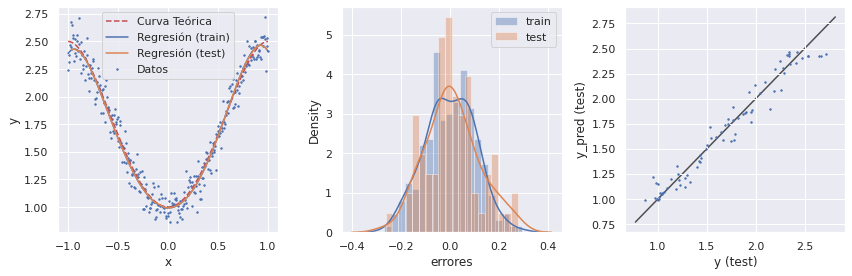

In [17]:
evaluar_regresion(reg_2, x,y, X_train_new, X_test_new, y_train, y_test)

In [18]:
print(X_train.shape, X_test.shape)

(225, 1) (75, 1)


### 3. Regularización

Esperamos haberte convencido de que crear nuevos atributos funciona. Sin embargo, este ejemplo que te mostramos es demasiado sencillo por varios motivos:
1. La relación entre los atributos y la variable a predecir es un polinomio de grado relativamente bajo. No solo eso, sino que además la conocemos.
2. Solamente contamos con una sola variable predictora, `x`, cuando en realidad podrían ser más de un atributo. Como mencionamos en la bitácora, cuando agreguemos nuevos atributos, no solamente podemos considerar las potencias de cada atributo, sino también las interacciones - cosas de la forma $x_1 x_2$.

No siempre sabremos hasta qué grado generar atributos ni si usar interraciones entre ellos. Es más, no siempre será un polinomio la relación entre $x$ e $y$, muchas veces directamente no tendremos claro qué tipo de relación es.

Por suerte, los polinomios suelen ser una buena aproximación a otras funciones. Si no funciona, **podemos generar atributos que no sean polinómicos**, pero eso es algo que deberás investigar por tu cuenta si alguna vez lo necesitas. Por ahora, **es suficiente que sepas que los atributos polinómicos no son la única opción, pero suelen ser una opción versátil.**

En lo que respecta al grado hasta el cual debemos agregar atributos, existe una técnica que nos permite controlar el error si nos pasamos un poco. Esta técnica se llama Regularización, y su alcance es mucho mayor que el aquí expuesto. Veamos cómo funciona.

Vamos a usar de referencia el modelo que entrenaste en la sección anterior. Por las dudas, lo vamos a dejar entrenado nuevamente aquí. Es importante que prestes atención a los coeficientes de esta regresión lineal.

Pendientes: [-0.03122096  2.73648208  0.27725702 -0.51087518 -0.36816938 -0.81701851
  0.13272674]
Ordenada: 0.992311880662411
Raíz del error cuadrático medio en Train: 0.10192587023193383
Raíz del error cuadrático medio en Test: 0.1096454992840806


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


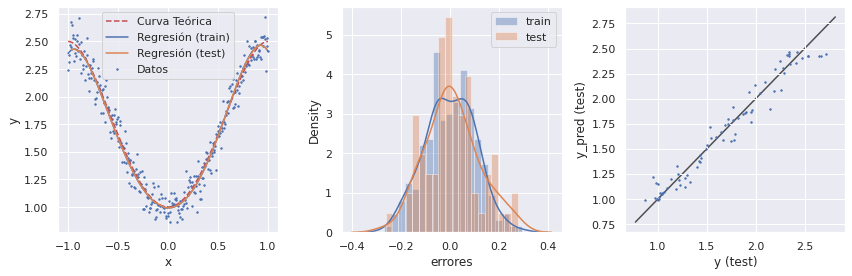

In [19]:
poly = PolynomialFeatures(degree = 7, include_bias=False) ### ACA TENDRAS QUE MODIFICAR MAS ADELANTE
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.transform(X_test) # VER

reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train)

print(f'Pendientes: {reg_2.coef_}')
print(f'Ordenada: {reg_2.intercept_}') #y_real = -1.5*x**4+3*x**2+1
evaluar_regresion(reg_2, x,y, X_train_new, X_test_new, y_train, y_test)


Ahora, vamos a entrenar dos regresiones sobre el mismo dataset, pero con regularización. Esto lo puedes hacer con las clases `Ridge` y `Lasso` de Scikit-Learn. Como siempre, es prácticamente obligatorio que consultes su documentación.

Empezamos entrenando el modelo `Ridge`. Presta atención a sus coeficientes:

In [20]:
from sklearn.linear_model import Ridge, Lasso

Pendientes: [ 0.01700482  0.84054658  0.01429365  0.41180311  0.00520742  0.16652299
 -0.00182328]
Ordenada: 1.2950100016791442
Raíz del error cuadrático medio en Train: 0.2389213626191976
Raíz del error cuadrático medio en Test: 0.22233696943772663


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


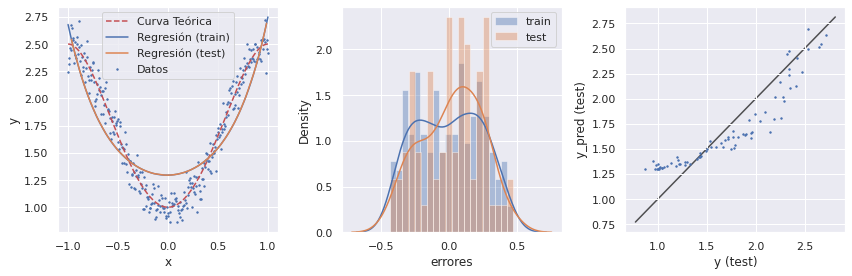

Pendientes: [ 0.01568719  1.10536797  0.01770298  0.39393025  0.00436909  0.01151392
 -0.00615556]
Ordenada: 1.232601089956859
Raíz del error cuadrático medio en Train: 0.20579858650021926
Raíz del error cuadrático medio en Test: 0.19269348739315517


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


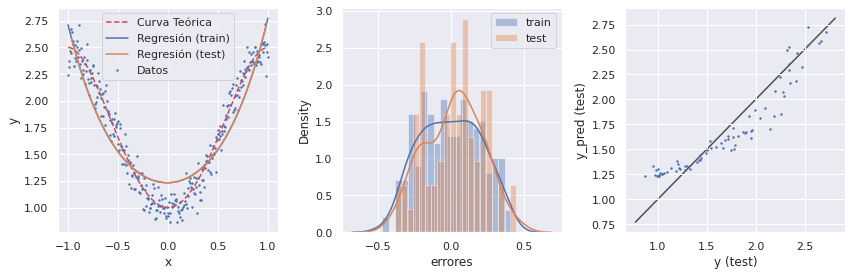

Pendientes: [ 9.33095384e-03  1.86917213e+00  3.77570497e-02  2.15793002e-01
  8.19383943e-04 -5.98348443e-01 -2.68821555e-02]
Ordenada: 1.1025226067017397
Raíz del error cuadrático medio en Train: 0.13227501155104893
Raíz del error cuadrático medio en Test: 0.13075581747253112


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


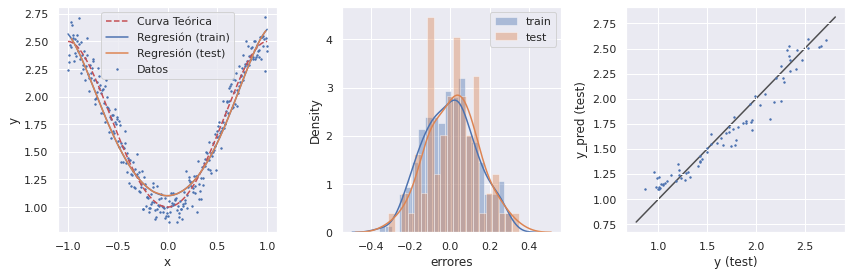

Pendientes: [ 4.74636478e-03  2.14086422e+00  5.29102611e-02  1.30731528e-01
 -1.65428022e-03 -8.23328485e-01 -3.98991108e-02]
Ordenada: 1.0618702166230811
Raíz del error cuadrático medio en Train: 0.1141780203589156
Raíz del error cuadrático medio en Test: 0.11747423063591246


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


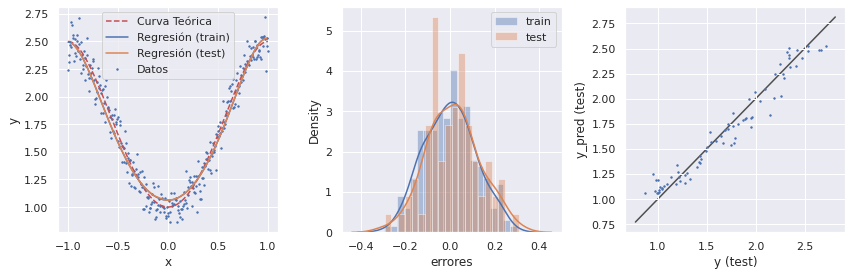

Pendientes: [-0.00604752  2.48312751  0.09097338 -0.04552065 -0.01517576 -1.03647542
 -0.06161239]
Ordenada: 1.0144236110568206
Raíz del error cuadrático medio en Train: 0.10286626137659563
Raíz del error cuadrático medio en Test: 0.11098775221366206


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


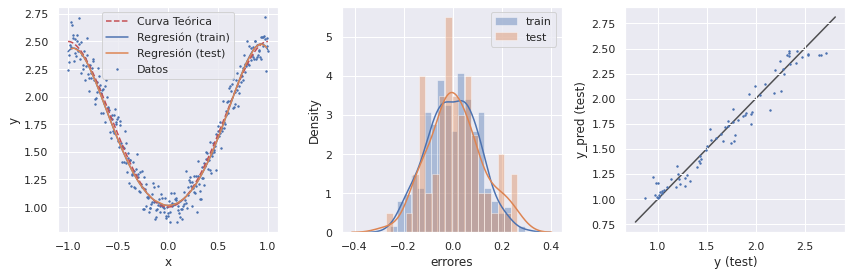

Pendientes: [-0.01670718  2.67262729  0.15612567 -0.35711908 -0.11820415 -0.91375767
 -0.01454191]
Ordenada: 0.9965006275391405
Raíz del error cuadrático medio en Train: 0.1019659203858829
Raíz del error cuadrático medio en Test: 0.11013130056203717


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


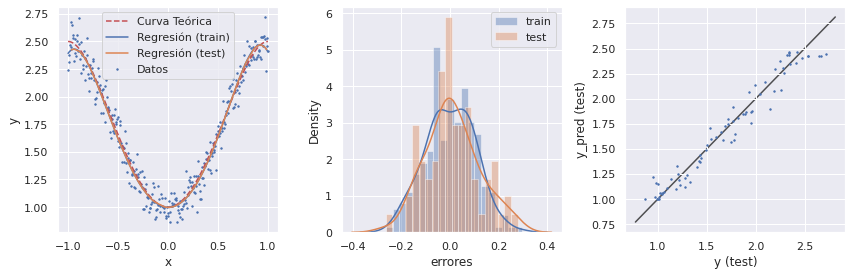

Pendientes: [-0.02048117  2.7000747   0.18682676 -0.42152195 -0.1803322  -0.87412086
  0.02153837]
Ordenada: 0.9946354440779615
Raíz del error cuadrático medio en Train: 0.10194106917648064
Raíz del error cuadrático medio en Test: 0.10992944248303596


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


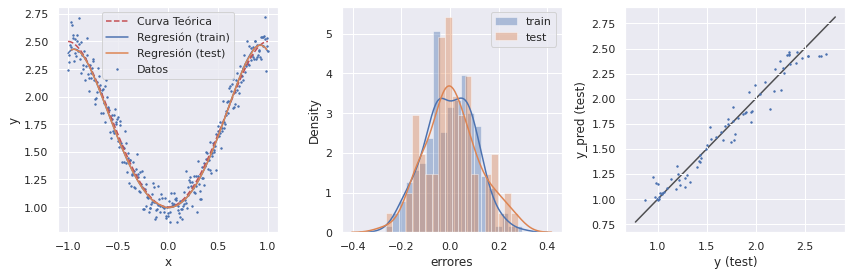

Pendientes: [-0.02768245  2.7281548   0.24724991 -0.49011707 -0.30549444 -0.83045688
  0.09548105]
Ordenada: 0.9928308021245708
Raíz del error cuadrático medio en Train: 0.1019270029082085
Raíz del error cuadrático medio en Test: 0.10971062331945787


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


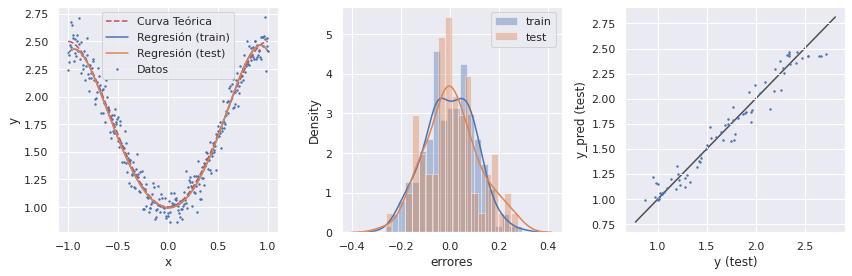

In [21]:
for alpha in [10, 5, 1, 0.5, 0.1 ,0.01, 0.005, 0.001]:
#for alpha in [0.001]:

    reg_ridge = Ridge(alpha= alpha)
    reg_ridge.fit(X_train_new,y_train)
    
    #y_train_pred_ridge = reg_ridge.predict(X_train_new)
    #y_test_pred_ridge = reg_ridge.predict(X_test_new)
    
    print(f'Pendientes: {reg_ridge.coef_}')
    print(f'Ordenada: {reg_ridge.intercept_}')
    evaluar_regresion(reg_ridge, x,y, X_train_new, X_test_new, y_train, y_test)

**Para Probar:** modifica el valor de `alpha` y observa su efecto. ¿Cómo cambian los coeficientes? **Tip:** varía en órdenes de magnitud,  (10, 5, 1, 0.5, 0.1 ,0.01, 0.005, 0.001, etc.).

`con alpha=10 lleva todos los coeficientes a cero, el rmse da mas alto`

`con alpha=0.001 da muy parecido al ajuste sin regularizacion`


Ahora, el modelo `Lasso`:

[0. 0. 0. 0. 0. 0. 0.] 1.6864408773391182
Raíz del error cuadrático medio en Train: 0.5466700947359129
Raíz del error cuadrático medio en Test: 0.5200937302757612


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


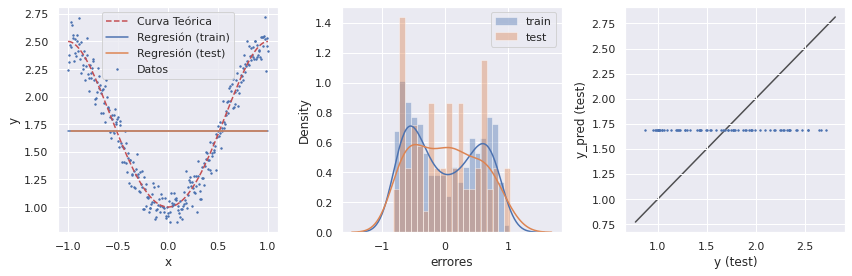

[0. 0. 0. 0. 0. 0. 0.] 1.6864408773391182
Raíz del error cuadrático medio en Train: 0.5466700947359129
Raíz del error cuadrático medio en Test: 0.5200937302757612


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


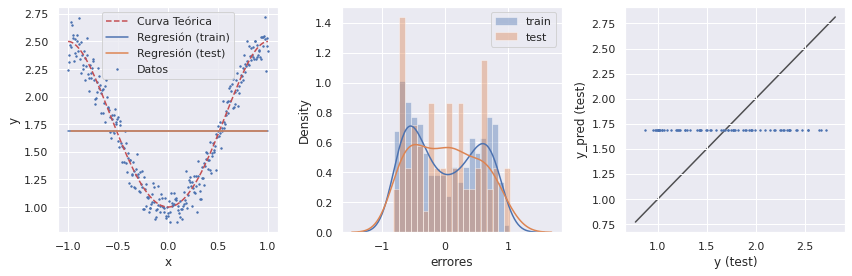

[0. 0. 0. 0. 0. 0. 0.] 1.6864408773391182
Raíz del error cuadrático medio en Train: 0.5466700947359129
Raíz del error cuadrático medio en Test: 0.5200937302757612


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


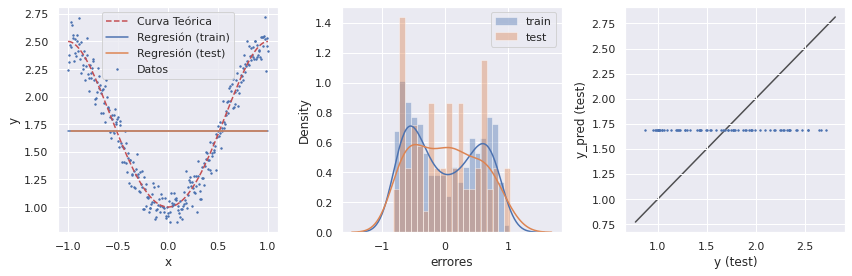

[0. 0. 0. 0. 0. 0. 0.] 1.6864408773391182
Raíz del error cuadrático medio en Train: 0.5466700947359129
Raíz del error cuadrático medio en Test: 0.5200937302757612


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


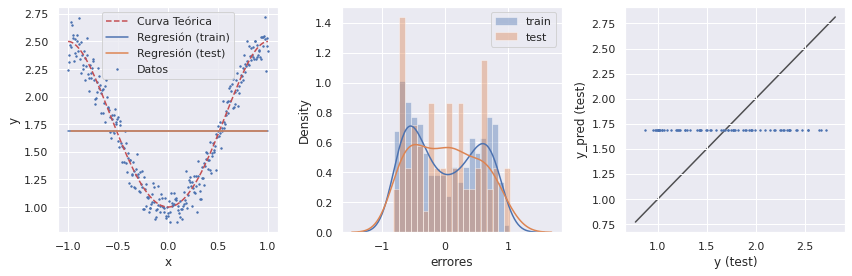

[0.         0.63233646 0.         0.         0.         0.
 0.        ] 1.474077006737412
Raíz del error cuadrático medio en Train: 0.3681947911749994
Raíz del error cuadrático medio en Test: 0.3487522042829004


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


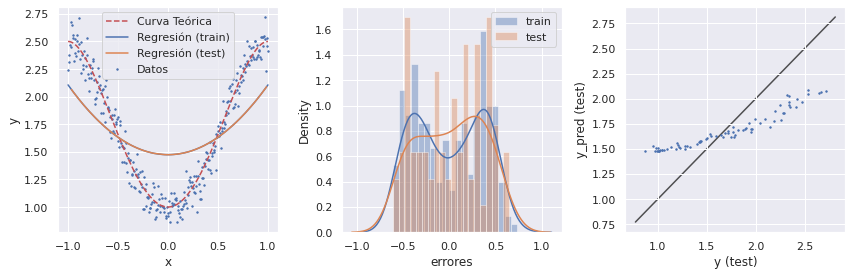

[ 0.          1.60987048  0.         -0.          0.         -0.
  0.        ] 1.1457819892003511
Raíz del error cuadrático medio en Train: 0.1674474901962628
Raíz del error cuadrático medio en Test: 0.1544528181344755


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


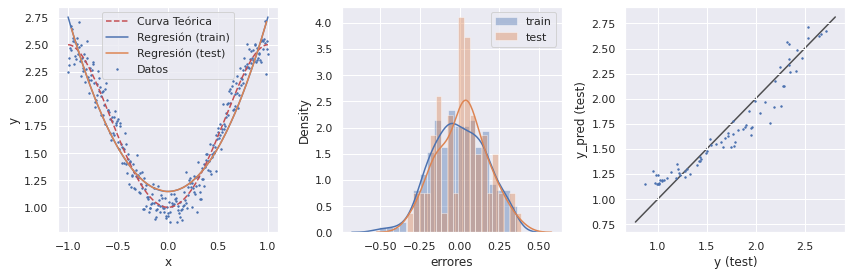

[ 0.00841304  1.98412085  0.         -0.          0.         -0.44941338
  0.        ] 1.0863273254089494
Raíz del error cuadrático medio en Train: 0.1304729445048657
Raíz del error cuadrático medio en Test: 0.1256554074195989


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


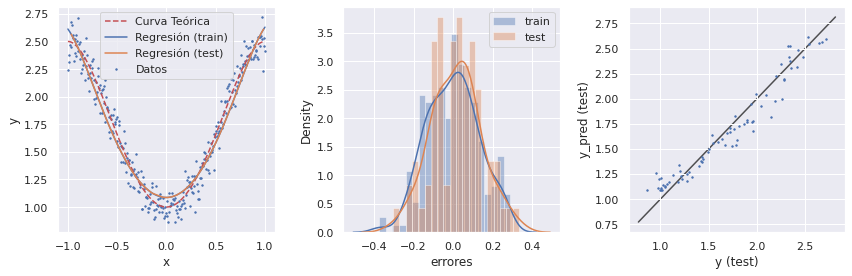

[ 0.01865645  2.4411247   0.         -0.          0.         -1.02974834
  0.        ] 1.0183793766585798
Raíz del error cuadrático medio en Train: 0.1036204722457226
Raíz del error cuadrático medio en Test: 0.11096835877724874


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


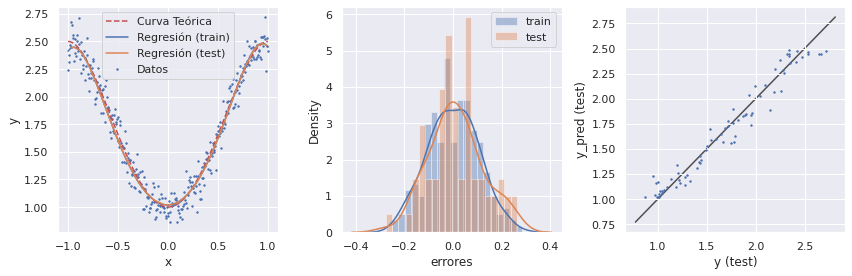

In [22]:
for alpha in [10, 5, 1, 0.5, 0.1 ,0.01, 0.005, 0.001]:
#for alpha in [0.001]:

    reg_lasso = Lasso(alpha = alpha)
    reg_lasso.fit(X_train_new,y_train)

    print(reg_lasso.coef_, reg_lasso.intercept_)
    
    y_train_pred_lasso = reg_lasso.predict(X_train_new)
    y_test_pred_lasso = reg_lasso.predict(X_test_new)
    evaluar_regresion(reg_lasso, x,y, X_train_new, X_test_new, y_train, y_test)


**Para Probar:** nuevamente, modifica el valor de `alpha` y observa su efecto. ¿Cómo cambian los coeficientes?¿Notas alguna diferencia con el modelo `Ridge`? ¡Hay una diferencia importante, que hace que la regresión `Lasso` sea muy apreciada!


`con alpha=10 todos los coeficientes son cero, el rmse da altisimo`

`con alpha=0.1 lleva iguala algunos coeficientes a cero`

`con alpha=0.001 da muy parecido al ajuste sin regularizacion`

**Extra**: `Para analizar que hace Lasso, podemos graficar la matriz de correlacion y ver que atributos estan correlacionados.
A alguno de los atributos correlacionados lo iguala a cero`


In [ ]:
cmap=sns.diverging_palette(5,250,as_cmap=True)
corr=pd.DataFrame(X_train_new).corr()
corr.style.background_gradient(cmap='coolwarm')

**¿Qué pasa por fuera del rango de entrenamiento?**

Estamos entrenando una regresión en un rango de $x$ entre -1 y 1. ¿Pero qué pasa si entrenamos en ese rango, y queremos ver cómo es la regresión por fuera? Es decir, para valores más grandes y más chicos que -1 y 1, respectivamente.

Vamos a usar los modelos obtenidos para predecir por fuera de ese rango. Por las dudas, **reentrena los modelos `ridge` y `lasso` con valores de `alpha` razonables.** Si tuvieras que apostar, ¿cuál modelo te parece más robusto?

In [23]:
reg_ridge = Ridge(alpha= 0.1)
reg_ridge.fit(X_train_new,y_train)

Ridge(alpha=0.1)

In [24]:
reg_lasso = Lasso(alpha = 0.001)
reg_lasso.fit(X_train_new,y_train)

Lasso(alpha=0.001)

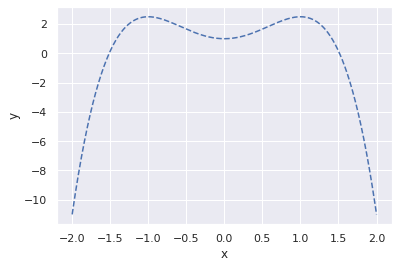

In [25]:
x_nuevo_rango = np.linspace(-2,2,1000)
y_nuevo_rango = -1.5*x_nuevo_rango**4+3*x_nuevo_rango**2+1

plt.plot(x_nuevo_rango, y_nuevo_rango, '--')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [26]:
X_nuevo_rango = poly.transform(x_nuevo_rango.reshape(-1,1))# VER

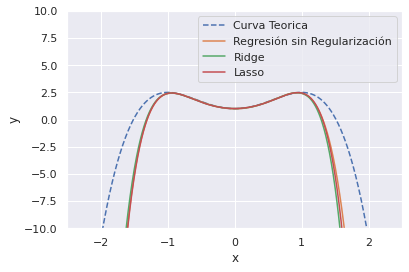

In [27]:
plt.plot(x_nuevo_rango, y_nuevo_rango, '--', label = 'Curva Teorica')
plt.plot(x_nuevo_rango, reg_2.predict(X_nuevo_rango), label = 'Regresión sin Regularización')
plt.plot(x_nuevo_rango, reg_ridge.predict(X_nuevo_rango), label = 'Ridge')
plt.plot(x_nuevo_rango, reg_lasso.predict(X_nuevo_rango), label = 'Lasso')
plt.legend()

### SI NO PUEDE VISUALIZAR CORRECTAMENTE, DESCOMENTA ESTAS LINEAS 
### Y PRUEBA DISTINTOS VALORES PARA LOS LIMITES
plt.xlim(-2.5,2.5)
plt.ylim(-10,10)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Tal vez el ejemplo por ahora no te parezca muy impresionante. De alguna forma, todos los modelos dan resultados muy parecidos. Pero recuerda lo siguiente: nosotros sabemos cómo es la relación funcional de los datos, un polinomio de grado 4. Cuando agregamos atributos, lo estamos haciendo hasta grado 7, lo cual no es mucho más grande que el grado original. 

**Para Probar:** Para ver el verdadero efecto de la regularización, agrega atributos polinómicos hasta un grado alto, por ejemplo 50, 100, 150 ó más. Vuelve a correr la regresión sin regularización, y la regresión Ridge y Lasso, y fíjate qué sucede. Tal vez puedes volver a probar con algunos valores nuevos de `alpha`.



Raíz del error cuadrático medio en Train: 0.08929332961700467
Raíz del error cuadrático medio en Test: 0.3100386733402452


/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


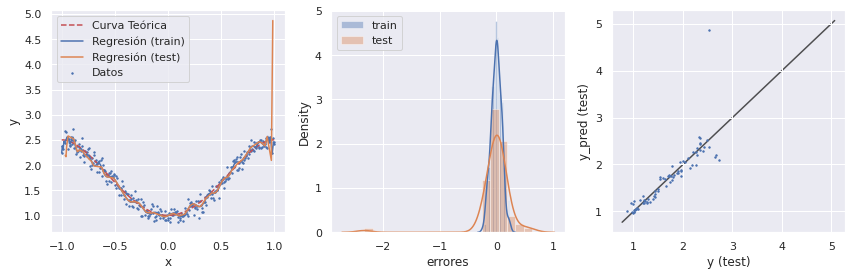

Pendientes: [ 1.19040306e+00  9.71613514e+00 -2.99378036e+02 -1.13190103e+03
  2.06404381e+04  5.62135391e+04 -6.40659566e+05 -1.28119776e+06
  1.11059929e+07  1.53211609e+07 -1.20746667e+08 -9.06774231e+07
  8.86247140e+08  3.85285140e+07 -4.65034870e+09  3.56980263e+09
  1.84806906e+10 -2.94813541e+10 -5.92609027e+10  1.27976589e+11
  1.60366095e+11 -3.41716360e+11 -3.58235121e+11  5.47996419e+11
  5.90494126e+11 -4.07232088e+11 -5.56079914e+11 -1.45928313e+11
 -9.11715360e+09  4.21792446e+11  5.65131604e+11  5.47174666e+10
 -1.52699245e+11 -3.62763688e+11 -5.86366048e+11 -1.40652846e+11
  6.37600270e+10  2.60094688e+11  6.28760117e+11  2.69945497e+11
  2.27728234e+11 -5.63865612e+10 -5.12930050e+11 -2.98059229e+11
 -5.42258878e+11 -1.67891094e+11  5.28603412e+10  1.02438433e+11
  5.65323719e+11  2.42773446e+11  5.04119861e+11  1.58131404e+11
 -7.06202152e+10 -5.50091995e+10 -5.66579736e+11 -2.02924652e+11
 -5.57316925e+11 -1.59883858e+11 -2.07031737e+10 -8.76429193e+09
  4.84187848e

In [28]:
poly = PolynomialFeatures(degree = 100, include_bias=False) ### ACA TENDRAS QUE MODIFICAR MAS ADELANTE
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.transform(X_test)

reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train)

evaluar_regresion(reg_2, x,y, X_train_new, X_test_new, y_train, y_test)
print(f'Pendientes: {reg_2.coef_}')
print(f'Ordenada: {reg_2.intercept_}') #y_real = -1.5*x**4+3*x**2+1


Pendientes: [-1.43702256e-02  2.37672810e+00  8.18636874e-02 -1.49549777e-03
  7.40158985e-02 -4.69815213e-01 -1.03165518e-02 -4.00862043e-01
 -6.18874570e-02 -2.39786645e-01 -7.63776046e-02 -1.02905303e-01
 -6.89767138e-02 -9.50902482e-03 -5.20348022e-02  4.64268679e-02
 -3.28590808e-02  7.51336432e-02 -1.51822445e-02  8.55042234e-02
 -6.18639263e-04  8.41625594e-02  1.03811379e-02  7.57534557e-02
  1.79666317e-02  6.34384283e-02  2.25669409e-02  4.93280116e-02
  2.47125133e-02  3.48051688e-02  2.49392271e-02  2.07541481e-02
  2.37398942e-02  7.71900698e-03  2.15429215e-02 -3.98732491e-03
  1.87062406e-02 -1.42080456e-02  1.55194911e-02 -2.28908067e-02
  1.22103197e-02 -3.00520342e-02  8.95238530e-03 -3.57522645e-02
  5.87370069e-03 -4.00791055e-02  3.06456960e-03 -4.31354994e-02
  5.84755672e-04 -4.50316891e-02 -1.53025920e-03 -4.58797768e-02
 -3.26394284e-03 -4.57901009e-02 -4.61425406e-03 -4.48688885e-02
 -5.58997139e-03 -4.32168000e-02 -6.20771063e-03 -4.09280966e-02
 -6.48953245e

/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


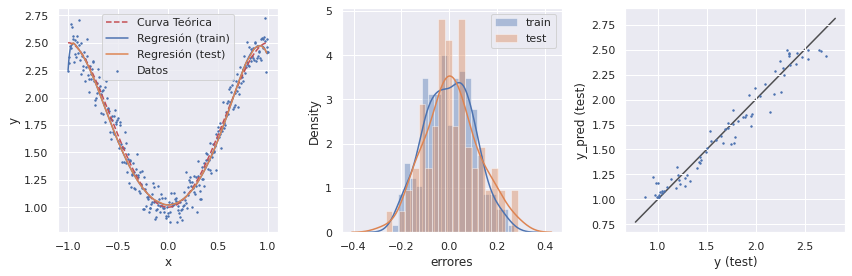

In [29]:
for alpha in [0.1]:

    reg_ridge = Ridge(alpha= alpha)
    reg_ridge.fit(X_train_new,y_train)

    print(f'Pendientes: {reg_ridge.coef_}')
    print(f'Ordenada: {reg_ridge.intercept_}')
    evaluar_regresion(reg_ridge, x,y, X_train_new, X_test_new, y_train, y_test)

[ 0.01763771  2.29152675  0.         -0.          0.         -0.14996232
  0.         -0.78693061  0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0. 

/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/estefi/anaconda3/envs/acamica/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


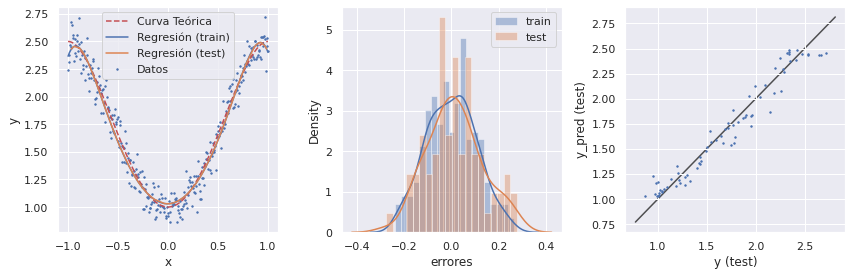

In [30]:
for alpha in [0.001]:
    reg_lasso = Lasso(alpha = alpha)
    reg_lasso.fit(X_train_new,y_train)

    print(reg_lasso.coef_, reg_lasso.intercept_)
    
    y_train_pred_lasso = reg_lasso.predict(X_train_new)
    y_test_pred_lasso = reg_lasso.predict(X_test_new)
    evaluar_regresion(reg_lasso, x,y, X_train_new, X_test_new, y_train, y_test)

## Conclusiones

Es posible ajustar relaciones no-lineales con un modelo lineal, pero tiene un costo: agregar nuevos atributos. Esto no solo hace crecer de manera considerable nuestro dataset, sino que además introduce un nuevo hiperparámetro, el grado hasta el cual agregamos atributos. Esto se soluciona parcialmente con regularización, pero a costa de otro hiperparámetro, la fuerza de la regularización, $\alpha$. Para colmo, estos hiperparámetros que acabamos de mencionar de alguna forma interactuan: a más atributos agreguemos, $\alpha$ probablemente deba tomar otro valor.

Como si esto no fuera poco, hay que tener mucho cuidado cuando usamos un modelo de regresión entrenado en un rango para predecir por fuera de ese rango. Como verás, las cosas pueden andar muy mal. Por suerte, esto no es un problema en muchas aplicaciones, pero es algo a lo que debes estar atento/a.


## 4. Ejercitación

Si todavía no estás muy cansado/a, puedes intentar hacer algunos de - o todos - los siguientes ejercicios:
1. Experimenta con alguna técnica para visualizar los coeficientes de una regresión, de forma tal de poder observar los efectos de la regularización en ellos.
1. Puedes aplicar lo que vimos hoy en cualquiera de los dos datasets que te dejamos para descargar en la bitácora. Son datasets sintéticos, pero te servirán como práctica más realista de estas herramientas.
1. ¿Recuerdas el Proyecto del Bloque 01? ¡Aplica lo aprendido en ese dataset!

`1. notebook regularizacion`